In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from  MAGNN_preprocess_utils.preprocess import (
    generate_paths,
    evaluate_metapath_adjacency_matrix,
    validate_expected_metapaths,
    get_symmetric_metapath_neighbor_pairs,
    get_edge_metapath_idx_array
)

## Check for non-zero entries in the adjacency matrix

In [2]:
# Load the adjacency matrix
adjM = np.load('data/preprocessed/raw_adjM.npz')

In [3]:
# example of non-zero entries in the adjacency matrix
adjM = adjM["arr_0"]
adjM[8202:8212, 0:10]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 2, 1, 1, 1, 1, 1, 1, 2, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 1]])

## Metapath Analysis

In [4]:
# TODO: Any other ways to summarize and compare the non-zero metapath adjacency matrix?

### Path count analysis
- sum of all values of each metapath type adjM (total path count)
- max value of node pair 
- average path count per node pair (mean_node_pair) <br> `metapath_adjM.sum() / (metapath_adjM.shape[0] * metapath_adjM.shape[1]`)
- min value of node pair in non-zero metapath adjM
- mean value of node pair in non-zero metapath adjM
- **desnity** is used for plots (proportion of non-zero node pairs in the graph network have at least one path along the metapath) <br> `np.count_nonzero(metapath_adjM) / (metapath_adjM[0] * metapath_adjM[1])`

In [5]:
type_mask = np.load('data/preprocessed/node_types.npy')

In [6]:
expected_metapath_l3 = generate_paths(3)
metapath_len3 = evaluate_metapath_adjacency_matrix(adjM, type_mask, expected_metapath_l3)
metapath_len3_df = pd.DataFrame(metapath_len3)
metapath_len3_df

,metapath,sum,max,min,mean,density,non_zero_mean
0,"(0, 1, 0)",3083925342,177,1,45.842081,0.729859,62.809481
1,"(0, 1, 2)",4465846,12,1,0.022855,0.015650,1.460403
2,"(0, 2, 0)",384891158,1011,1,5.721349,0.015410,371.274302
3,"(0, 2, 1)",1497403,159,1,0.203302,0.042238,4.813284
4,"(1, 0, 1)",41568096,6493,1,51.547482,0.094224,547.071003
5,"(1, 0, 2)",2961493,65,1,0.138432,0.007306,18.947734
6,"(1, 2, 0)",1497403,159,1,0.203302,0.042238,4.813284
7,"(1, 2, 1)",92218,20017,1,0.114357,0.035901,3.185313
8,"(2, 0, 1)",2961493,65,1,0.138432,0.007306,18.947734
9,"(2, 0, 2)",437895926,906,1,0.771575,0.003860,199.866325


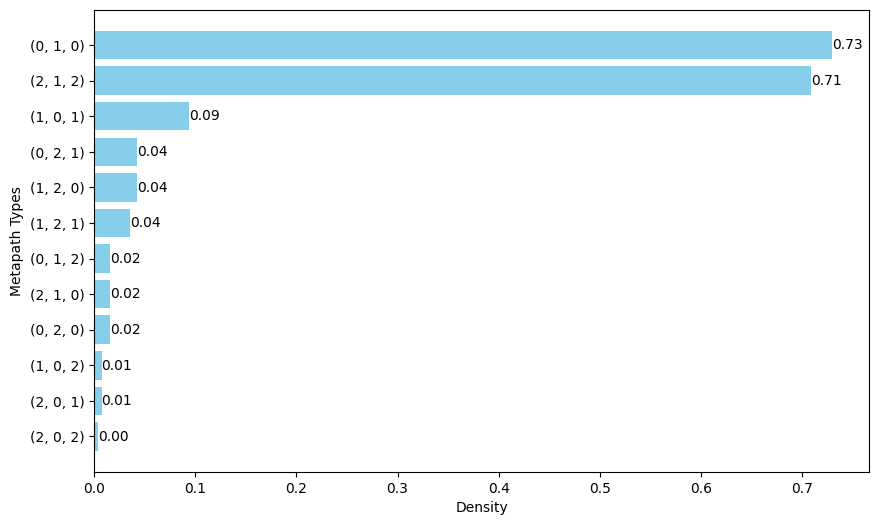

In [7]:
sorted_metapath_len3_df = metapath_len3_df.sort_values(by='density', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(sorted_metapath_len3_df['metapath'].astype(str), sorted_metapath_len3_df['density'], color='skyblue')
plt.xlabel('Density')
plt.ylabel('Metapath Types')
plt.gca().invert_yaxis()
for index, value in enumerate(sorted_metapath_len3_df['density']):
    plt.text(value, index, f'{value:.2f}', va='center')
plt.show()

In [8]:
possible_metapath_l4 = generate_paths(4)
# [1, 0, 0, 1] # this metapath does not exist, output is 0
metapath_len4 = evaluate_metapath_adjacency_matrix(adjM, type_mask, possible_metapath_l4)
metapath_len4_df = pd.DataFrame(metapath_len4)
metapath_len4_df

,metapath,sum,max,min,mean,density,non_zero_mean
0,"(0, 1, 0, 1)",253329485233,591354,1,34394.550576,0.331522,103747.279759
1,"(0, 1, 0, 2)",17873352716,5524,1,91.472344,0.052525,1741.515647
2,"(0, 1, 2, 0)",1027064705,652,1,15.267161,0.111751,136.618012
3,"(0, 1, 2, 1)",43937156,1495,1,5.965349,0.357112,16.704409
4,"(0, 2, 0, 1)",1878109982,34334,1,254.991039,0.033218,7676.188378
5,"(0, 2, 0, 2)",280142588214,562988,1,1433.715304,0.010019,143093.646563
6,"(0, 2, 1, 0)",1027064705,652,1,15.267161,0.111751,136.618012
7,"(0, 2, 1, 2)",232975416,1250,1,1.192323,0.101054,11.798923
8,"(1, 0, 1, 0)",253329485233,591354,1,34394.550576,0.331522,103747.279759
9,"(1, 0, 1, 2)",364567556,37666,1,17.041398,0.018621,915.180281


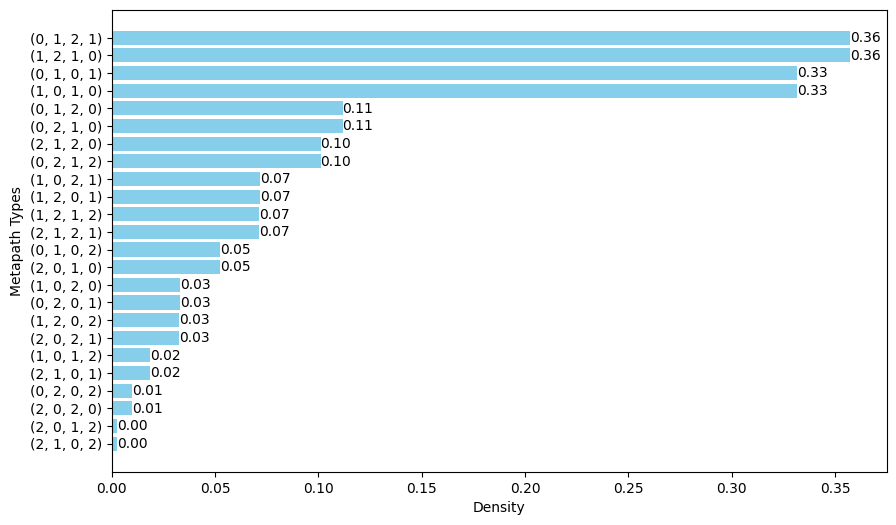

In [9]:
sorted_metapath_len4_df = metapath_len4_df.sort_values(by='density', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(sorted_metapath_len4_df['metapath'].astype(str), sorted_metapath_len4_df['density'], color='skyblue')
plt.xlabel('Density')
plt.ylabel('Metapath Types')
plt.gca().invert_yaxis()
for index, value in enumerate(sorted_metapath_len4_df['density']):
    plt.text(value, index, f'{value:.2f}', va='center')
plt.show()

In [10]:
possible_metapath_l5 = generate_paths(5)
metapath_len5 = evaluate_metapath_adjacency_matrix(adjM, type_mask, possible_metapath_l5)
metapath_len5_df = pd.DataFrame(metapath_len5)
metapath_len5_df

,metapath,sum,max,min,mean,density,non_zero_mean
0,"(0, 1, 0, 1, 0)",1546642383952656,55397856,1,2.299060e+07,0.763526,3.011109e+07
1,"(0, 1, 0, 1, 2)",2215985593018,3520555,1,1.134098e+04,0.045641,2.484837e+05
2,"(0, 1, 0, 2, 0)",11347515480568,3124192,1,1.686791e+05,0.136566,1.235145e+06
3,"(0, 1, 0, 2, 1)",47420772700,611799,1,6.438320e+03,0.414018,1.555082e+04
4,"(0, 1, 2, 0, 1)",5500746370,30464,1,7.468365e+02,0.202378,3.690307e+03
5,"(0, 1, 2, 0, 2)",717599413905,437379,1,3.672534e+03,0.055738,6.588877e+04
6,"(0, 1, 2, 1, 0)",53401502874,7155,1,7.938052e+02,0.628132,1.263755e+03
7,"(0, 1, 2, 1, 2)",6602017233,10665,1,3.378784e+01,0.712518,4.742036e+01
8,"(0, 2, 0, 1, 0)",11347515480568,3124192,1,1.686791e+05,0.136566,1.235145e+06
9,"(0, 2, 0, 1, 2)",17697043437,202813,1,9.057003e+01,0.007879,1.149464e+04


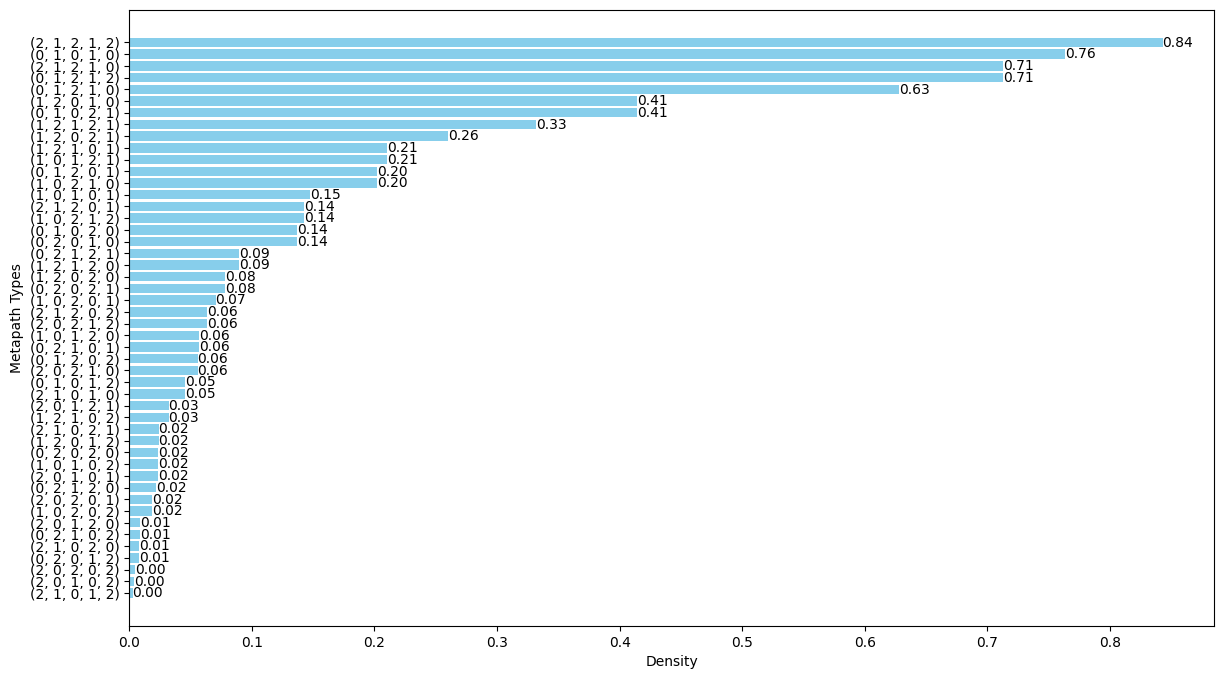

In [11]:
sorted_metapath_len5_df = metapath_len5_df.sort_values(by='density', ascending=False)

plt.figure(figsize=(14, 8))
plt.barh(sorted_metapath_len5_df['metapath'].astype(str), sorted_metapath_len5_df['density'], color='skyblue')
plt.xlabel('Density')
plt.ylabel('Metapath Types')
plt.gca().invert_yaxis()
for index, value in enumerate(sorted_metapath_len5_df['density']):
    plt.text(value, index, f'{value:.2f}', va='center')
plt.show()

In [12]:
possible_metapath_l6 = generate_paths(6)
metapath_len6 = evaluate_metapath_adjacency_matrix(adjM, type_mask, possible_metapath_l6)
metapath_len6_df = pd.DataFrame(metapath_len6)
metapath_len6_df

,metapath,sum,max,min,mean,density,non_zero_mean
0,"(0, 1, 0, 1, 0, 1)",127058194892968104,296202926242,1,1.725069e+10,0.335707,5.138616e+10
1,"(0, 1, 0, 1, 0, 2)",8964077068696278,2749159148,1,4.587640e+07,0.053185,8.625824e+08
2,"(0, 1, 0, 1, 2, 0)",511055125680173,144812389,1,7.596757e+06,0.130610,5.816384e+07
3,"(0, 1, 0, 1, 2, 1)",21865238245734,302849257,1,2.968644e+06,0.492256,6.030692e+06
4,"(0, 1, 0, 2, 0, 1)",58167931228937,139264039,1,7.897461e+06,0.247525,3.190569e+07
...,...,...,...,...,...,...,...
91,"(2, 1, 2, 0, 2, 1)",396193403504,97370734,1,1.851972e+04,0.488482,3.791281e+04
92,"(2, 1, 2, 1, 0, 1)",539480417523,25998168,1,2.521755e+04,0.361709,6.971773e+04
93,"(2, 1, 2, 1, 0, 2)",41142877523,264275,1,7.249395e+01,0.057064,1.270386e+03
94,"(2, 1, 2, 1, 2, 0)",668225198824,1415947,1,3.419847e+03,0.138572,2.467929e+04


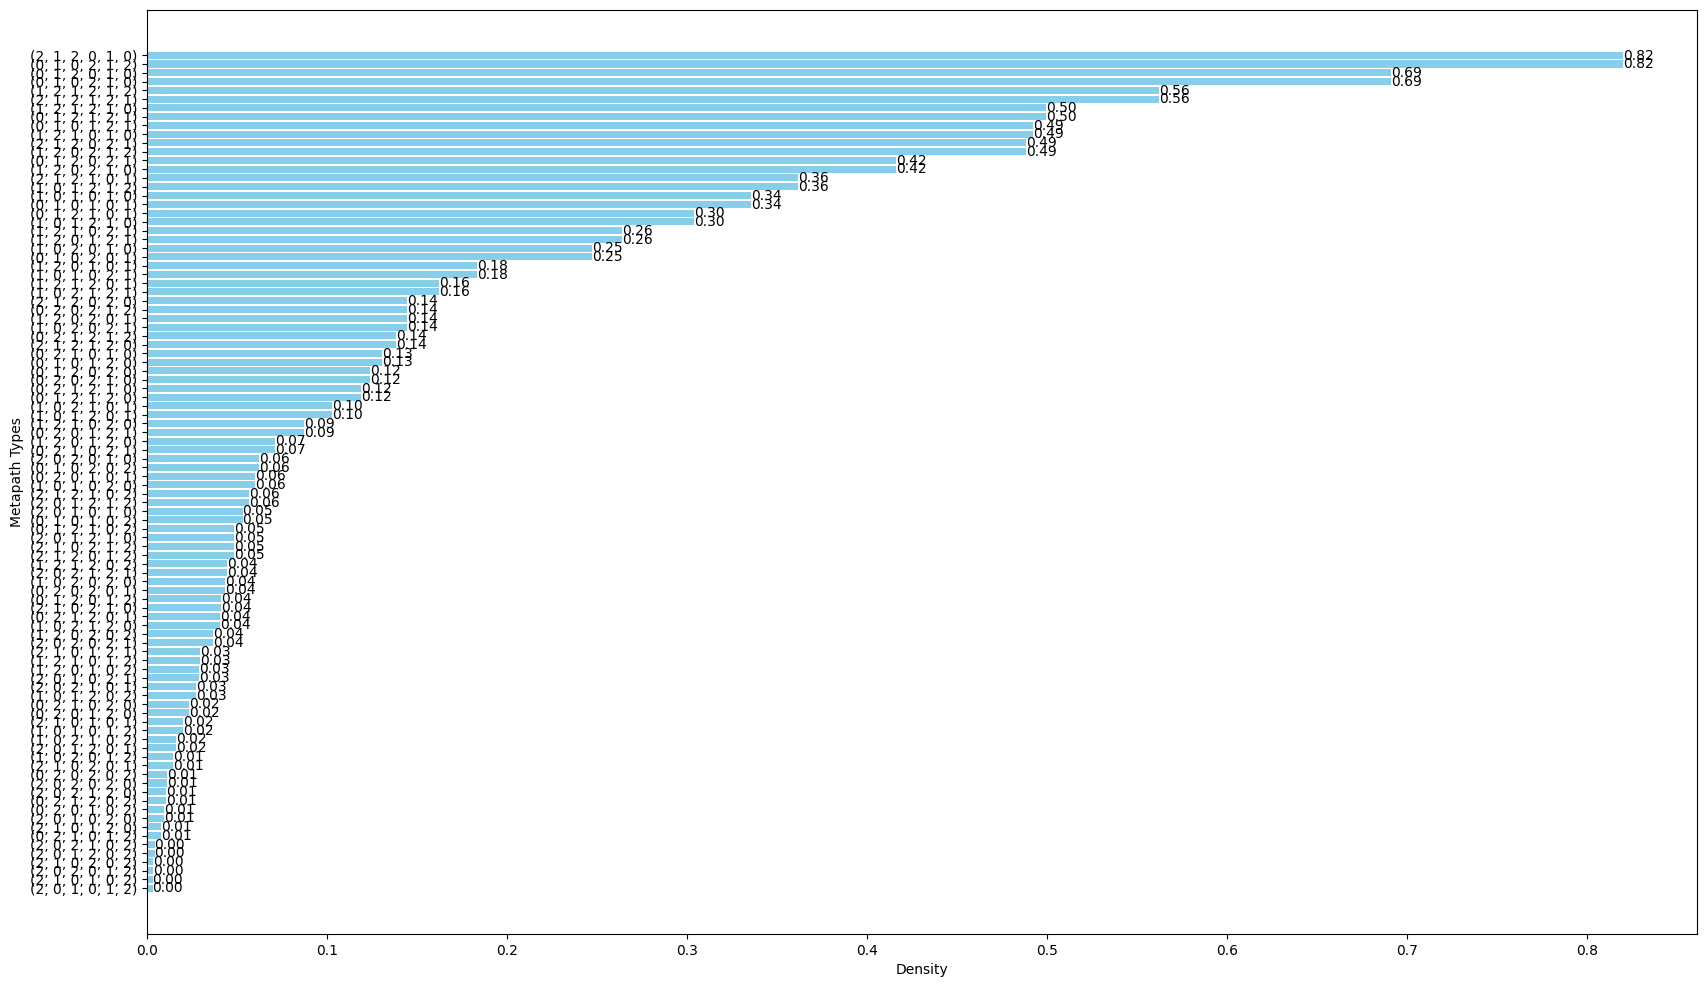

In [13]:
sorted_metapath_len6_df = metapath_len6_df.sort_values(by='density', ascending=False)

plt.figure(figsize=(20, 12))
plt.barh(sorted_metapath_len6_df['metapath'].astype(str), sorted_metapath_len6_df['density'], color='skyblue')
plt.xlabel('Density')
plt.ylabel('Metapath Types')
plt.gca().invert_yaxis()
for index, value in enumerate(sorted_metapath_len6_df['density']):
    plt.text(value, index, f'{value:.2f}', va='center')
plt.show()

In [14]:
expected_metapaths = [(0, 1, 0), (0, 2, 0), (1, 0, 1), (2, 0, 2), (1, 2, 1), (2, 1, 2), 
                      (0, 1, 2, 1, 0), (1, 0, 2, 0, 1), (0, 2, 1, 2, 0), (1, 2, 0, 2, 1), (2, 0, 1, 0, 2),  (2, 1, 0, 1, 2)]

validate_expected_metapaths(possible_metapath_l4, expected_metapaths)
validate_expected_metapaths(possible_metapath_l5, expected_metapaths)

Metapath types have all expected triple combinations!
Metapath types have all expected triple combinations!


In [15]:
expected_metapaths_simplified = [(0, 1, 0), (1, 0, 1), 
                                 (0, 1, 2, 1, 0), (1, 0, 2, 0, 1), (0, 2, 1, 2, 0), (1, 2, 0, 2, 1)]
validate_expected_metapaths(possible_metapath_l4, expected_metapaths_simplified)
validate_expected_metapaths(possible_metapath_l5, expected_metapaths_simplified)

Metapath types have all expected triple combinations!
Metapath types have all expected triple combinations!


## Final expected metapath types:
`[(0, 1, 0), (0, 2, 0), (1, 0, 1), (2, 0, 2), (1, 2, 1), (2, 1, 2),` <br>
`(0, 1, 2, 1, 0), (1, 0, 2, 0, 1), (0, 2, 1, 2, 0), (1, 2, 0, 2, 1), (2-0-1-0-2),  (2-1-0-1-2)]`

In [16]:
expected_metapaths = [(0, 1, 0), (0, 2, 0), (1, 0, 1), (2, 0, 2), (1, 2, 1), (2, 1, 2), 
                      (0, 1, 2, 1, 0), (1, 0, 2, 0, 1), (0, 2, 1, 2, 0), (1, 2, 0, 2, 1), (2, 0, 1, 0, 2),  (2, 1, 0, 1, 2)]
neighbor_pairs = get_symmetric_metapath_neighbor_pairs(adjM, type_mask, expected_metapaths)
edge_metapath_idx_array = get_edge_metapath_idx_array(neighbor_pairs)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x10556f3d0>>
Traceback (most recent call last):
  File "/Users/bailinzhang/Documents/Wu_Lab/Side_Projects/MKG_data_processing/.venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
edge_metapath_idx_array[0]

In [ ]:
np.savez("data/edge_metapath_idx_array.npz", edge_metapath_idx_array)